# Amadeus Challenge

In [12]:
import pandas as pd

In [2]:
import bz2

### Extraer Ficheros

In [3]:
!bunzip2 bookings.csv.bz2


bunzip2: I/O or other error, bailing out.  Possible reason follows.
bunzip2: No such file or directory
	Input file = bookings.csv.bz2, output file = bookings.csv


In [3]:
!bunzip2 searches.csv.bz2

## Ejercicio 1

### Count the number of lines Bookings (Python + Command Line)

#### For uncompressed files

In [6]:
!wc -l '/home/isabel/Repos/Amadeus_Challenge/bookings.csv'

10000011 /home/isabel/Repos/Amadeus_Challenge/bookings.csv


In [5]:
!sort -u -t "^" '/home/isabel/Repos/Amadeus_Challenge/bookings.csv' | wc -l

1000004


In [ ]:
count = 0
for line in open("/home/isabel/Documentos/Master_KSchool/04_Amadeus_Challenge/bookings.csv").xreadlines():
    count += 1

#### For compressed files

In [ ]:
!bzcat '/home/isabel/Documentos/Master_KSchool/04_Amadeus_Challenge/bookings.csv.bz2' | wc -l

In [10]:
with bz2.BZ2File('/home/isabel/Documentos/Master_KSchool/04_Amadeus_Challenge/bookings.csv.bz2') as fileBz2:
    result = 0
    for line in fileBz2:
        result += line
    print (result)

100000210000110


### Count the number of lines Searches (Python + Command Line)

In [7]:
!sort -u -t "^" searches.csv | wc -l

359005


In [8]:
!wc -l searches.csv

20390198 searches.csv


In [17]:
count = len(open("searches.csv").readlines())
count

20390199

## Ejercicio 2

Top 10 arrival airports in the world in 2013 (using the bookings file): sum the total number of passengers and print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (GeoBases in GitHub)
Bonus point: Solve this problem using Pandas (instead of any other approach)

### 1) Inspect the data
(using a sample)

In [15]:
df0 = pd.read_csv('/home/isabel/Documentos/Master_KSchool/04_Amadeus_Challenge/bookings.csv.bz2', sep = "^", nrows = 9999)
pd.set_option('display.max_columns', None)
df0.head(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


#### List of Columns

In [17]:
list(df0.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [18]:
!head -1 bookings.csv | tr "^" "\t"

act_date           	source	pos_ctry	pos_iata	pos_oid  	rloc          	cre_date           	duration	distance	dep_port	dep_city	dep_ctry	arr_port	arr_city	arr_ctry	lst_port	lst_city	lst_ctry	brd_port	brd_city	brd_ctry	off_port	off_city	off_ctry	mkt_port	mkt_city	mkt_ctry	intl	route          	carrier	bkg_class	cab_class	brd_time           	off_time           	pax	year	month	oid      


In [19]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 38 columns):
act_date               9999 non-null object
source                 9999 non-null object
pos_ctry               9999 non-null object
pos_iata               9999 non-null object
pos_oid                9999 non-null object
rloc                   9999 non-null object
cre_date               9999 non-null object
duration               9999 non-null int64
distance               9999 non-null int64
dep_port               9999 non-null object
dep_city               9999 non-null object
dep_ctry               9999 non-null object
arr_port               9999 non-null object
arr_city               9999 non-null object
arr_ctry               9999 non-null object
lst_port               9999 non-null object
lst_city               9999 non-null object
lst_ctry               9999 non-null object
brd_port               9999 non-null object
brd_city               9999 non-null object
brd_ctry       

In [20]:
df0.describe()

,duration,distance,intl,pax,year,month
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0
mean,20209.746075,455.608861,0.596260,0.516152,2013.0,3.0
std,42243.233482,1738.891068,0.490671,1.783970,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7721.000000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


### 2) Select relevant Columns
(with the same sample)

In [19]:
!csvcut -d "^" -c arr_port, pax bookings.csv | csvstat

usage: csvcut [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
              [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H]
              [-K SKIP_LINES] [-v] [-l] [--zero] [-V] [-n] [-c COLUMNS]
              [-C NOT_COLUMNS] [-x]
              [FILE]
csvcut: error: unrecognized arguments: bookings.csv



#### With Pandas

In [33]:
df1 = pd.read_csv('/home/isabel/Documentos/Master_KSchool/04_Amadeus_Challenge/bookings.csv.bz2',\
                  sep = "^", usecols = ["arr_port", "pax", "year"], iterator = True) 

In [36]:
for i, chunk in enumerate(df1):
    # Get chunk
    chunk = df1.get_chunk(1000000)
    
    # Drop duplicates
    chunk = chunk.dropna()
    # Filter for year 2013 and delete year column
    chunk = chunk[chunk["year"] == 2013]
    del chunk["year"]
   
    # Create variable result_chunk
    result_chunk = chunk.groupby(['arr_port']).sum()
    
    # Append chunks in the resulting Data Frame:
    all_chunks = all_chunks.append(result_chunk)
    
    

StopIteration: 

In [37]:
# Create Data Frame, group by "arr_port" and filter by "pax", then sort the data and return top ten arriving airport by passenger affluence 
df2 = pd.DataFrame(all_chunks.groupby("arr_port")["pax"].sum().sort_values(ascending = False).reset_index())

df2.head(10)


,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


### Bonus Point

In [48]:
# Read GeoBases .csv
filepath = "https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv"

# Since, there is no header, we should introduce header = None as arg, select columns (iata_code, port_name, country) and define column names
columns = ['iata_code', 'port_name', 'country']
iata_names = pd.read_csv(filepath, delimiter = "^", header = None, usecols = [0, 1, 4], names = columns)

iata_names.head()

,iata_code,port_name,country
0,AUH,Abu Dhabi International Airport,United Arab Emirates
1,AZI,Abu Dhabi Bateen Airport,United Arab Emirates
2,AAN,Al Ain International Airport,United Arab Emirates
3,DXB,Dubai International Airport,United Arab Emirates
4,FJR,Fujairah,United Arab Emirates


In [54]:
# Before merging the two Data Frames, we shall set 'iata_code' and 'arr_port' as index in their respective DF, one after another

iata_names["iata_code"] = iata_names["iata_code"].str.strip()
iata_names.set_index("iata_code")

,port_name,country
iata_code,,
AUH,Abu Dhabi International Airport,United Arab Emirates
AZI,Abu Dhabi Bateen Airport,United Arab Emirates
AAN,Al Ain International Airport,United Arab Emirates
DXB,Dubai International Airport,United Arab Emirates
FJR,Fujairah,United Arab Emirates
...,...,...
OHD,Ohrid,NaN
SKP,Skopje-Petrovec,NaN
PSY,Stanley Airport,NaN


In [56]:
# Before merging the two Data Frames, we shall set 'iata_code' and 'arr_port' as index in their DF one after another

df2["arr_port"] = df2["arr_port"].str.strip()
df2.set_index("arr_port")

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
...,...
MYJ,-80.0
UPG,-90.0
XWG,-90.0


In [57]:
# Merge files on index to include names of country and airprt
df3 = df2.join(iata_names, how = "left")
df3

,arr_port,pax,iata_code,port_name,country
0,LHR,88809.0,AUH,Abu Dhabi International Airport,United Arab Emirates
1,MCO,70930.0,AZI,Abu Dhabi Bateen Airport,United Arab Emirates
2,LAX,70530.0,AAN,Al Ain International Airport,United Arab Emirates
3,LAS,69630.0,DXB,Dubai International Airport,United Arab Emirates
4,JFK,66270.0,FJR,Fujairah,United Arab Emirates
...,...,...,...,...,...
2269,MYJ,-80.0,PBF,Grider Field,United States
2270,UPG,-90.0,CDH,Harrell Field,United States
2271,XWG,-90.0,DEQ,J Lynn Helms Airport,United States
2272,MZV,-350.0,JBR,Jonesboro Municipal Airport,United States


## Ejercicio 3

Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona. For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)

With the Command line

In [19]:
!wc -l searches.csv

20390198 searches.csv


In [5]:
!head -1 searches.csv | tr "^" "\t"

Date	Time	TxnCode	OfficeID	Country	Origin	Destination	RoundTrip	NbSegments	Seg1Departure	Seg1Arrival	Seg1Date	Seg1Carrier	Seg1BookingCode	Seg2Departure	Seg2Arrival	Seg2Date	Seg2Carrier	Seg2BookingCode	Seg3Departure	Seg3Arrival	Seg3Date	Seg3Carrier	Seg3BookingCode	Seg4Departure	Seg4Arrival	Seg4Date	Seg4Carrier	Seg4BookingCode	Seg5Departure	Seg5Arrival	Seg5Date	Seg5Carrier	Seg5BookingCode	Seg6Departure	Seg6Arrival	Seg6Date	Seg6Carrier	Seg6BookingCode	From	IsPublishedForNeg	IsFromInternet	IsFromVista	TerminalID	InternetOffice


In [11]:
!csvlook -d "^" searches.csv | head

^C


In [12]:
!csvcut -d "^" -c Date, Destination searches.csv | csvstat

usage: csvcut [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
              [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H]
              [-K SKIP_LINES] [-v] [-l] [--zero] [-V] [-n] [-c COLUMNS]
              [-C NOT_COLUMNS] [-x]
              [FILE]
csvcut: error: unrecognized arguments: searches.csv



In [13]:
!csvgrep -d "^" -c Destination -m MAL searches.csv Date, Destination

usage: csvgrep [-h] [-d DELIMITER] [-t] [-q QUOTECHAR] [-u {0,1,2,3}] [-b]
               [-p ESCAPECHAR] [-z FIELD_SIZE_LIMIT] [-e ENCODING] [-S] [-H]
               [-K SKIP_LINES] [-v] [-l] [--zero] [-V] [-n] [-c COLUMNS]
               [-m PATTERN] [-r REGEX] [-f MATCHFILE] [-i]
               [FILE]
csvgrep: error: unrecognized arguments: Date, Destination


With Pandas

In [32]:
# 1) read the csv file in chunks selecting relevant columns
df_reader = pd.read_csv("searches.csv", sep = "^", iterator = True, chunksize = 10000, usecols = ["Date", "Destination"], parse_dates = ["Date"])
df_searches = df_reader.get_chunk()
df_searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [33]:
# 2) filter Destination column: MAD, BCN, AGP
# 2.1) Strip
df_searches["Destination"] = df_searches["Destination"].str.strip()

# 2.2) Query
filter = (df_searches["Destination"] == "MAD") | (df_searches["Destination"] == "BCN") | (df_searches["Destination"] == "AGP")

# 2.3) Filter
df_filter = df_searches[filter]
df_filter

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
...,...,...
9830,2013-01-10,AGP
9881,2013-01-10,BCN
9906,2013-01-10,MAD
9947,2013-01-10,MAD


In [35]:
# 3) Convert dates to datetime
df_filter["Date"] = pd.to_datetime(df_filter["Date"])

/home/isabel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
import matplotlib.pyplot as plt

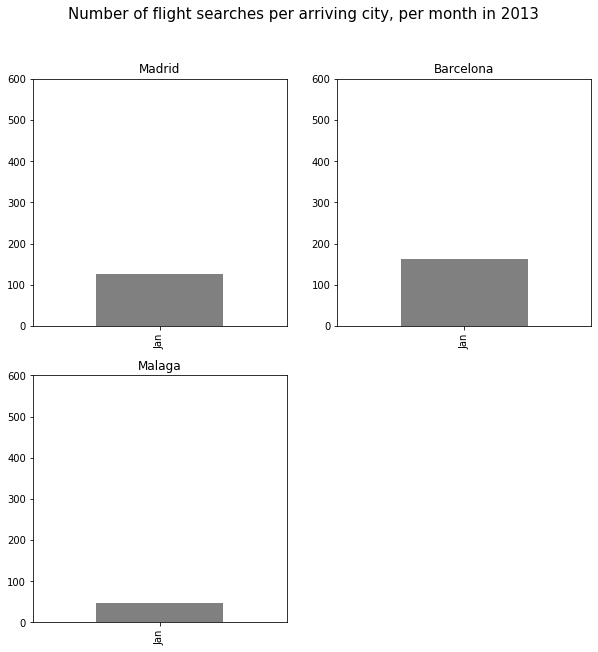

In [50]:
# 4) Plot results

# 4.1) Define airports and month
airports = {"MAD":"Madrid","BCN":"Barcelona","AGP":"Malaga"}
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]

# 4.2) Create figure
fig = plt.figure(figsize = (10, 10))
fig.suptitle('Number of flight searches per arriving city, per month in 2013', fontsize = 15)

# 4.3) Aggregate and plot

for i, airp in enumerate(airports):
    ax = fig.add_subplot(2, 2, i + 1)
    to_plot = df_filter[df_filter["Destination"] == airp].resample("M", on = "Date").count()
    to_plot["Date"].plot(kind = "bar", title = airports[airp], color = "grey")
    ax.set_xticklabels(months)
    ax.xaxis.set_label_text("")
    ax.set_ylim(0,600)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [51]:
# Plot monthly searches for arriving city in one figure:

new = pd.DataFrame()

for i,airp in enumerate(airports):
    to_plot2 = df_filter[df_filter["Destination"] == airp].resample("M", on = "Date").count()["Destination"]
    new[airports[airp]]=to_plot2
    
new.index = months
new.plot(kind = "bar",figsize = (10,5), rot = 45, title = "Number of flight searches per arriving city, per month in 2013")

ValueError: Length mismatch: Expected axis has 1 elements, new values have 12 elements

## Ejercicio 4

Match searches with bookings

For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

In [9]:
df3 = pd.read_csv("searches.csv", sep = "^", usecols = ["Origin", "Destination"],low_memory = False)

In [11]:
df4 = pd.read_csv("bookings.csv", sep = "^", usecols = ["dep_port", "arr_port"])

In [12]:
df4.columns = ["Origin", "Destination"]

In [23]:
df3.merge(df4, on = ["Origin", "Destination"], how = "inner")

,Origin,Destination


In [ ]:
for search in df3:
    if df4[["Origin", "Destination"]] == df3[["Origin", "Destination"]]:
       df3["Search&Booking"] = 1 else 0